In [1]:
#Import lib
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from my_useful_functions import calculate_performance_statistical_parity,calculate_performance_equalized_odds,calculate_performance_equal_opportunity,calculate_performance_predictive_parity,calculate_performance_predictive_equality,calculate_performance_treatment_equality
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from compute_abroca import *
import numpy as np
import sklearn.metrics as metrics 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_law():
    df = pd.read_csv('data/law_school_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Non-White"
    class_label = 'pass_bar'
    filename = "DT.law.abroca.pdf"    
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [3]:
def load_student_academics():
    df = pd.read_csv('data/student_aca_clean.csv')    
    protected_attribute = 'ge'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "DT.student-academics.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "Good-and-higher" else 0 for v in df['class']]
    #Label sex
    df['ge']=["Female" if v == "F" else "Male" for v in df['ge']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [4]:
def load_xAPI_Edu():
    df = pd.read_csv('data/xAPI-Edu-Data.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class'
    filename = "DT.xAPI-Edu-Data.abroca.pdf"    
    
    #Label class
    df['Class']=[1 if v == "Medium-High" else 0 for v in df['Class']]
    #Label sex
    df['gender']=["Female" if v == "F" else "Male" for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [5]:
def load_student_mat():
    df = pd.read_csv('data/student_mat_clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class'
    filename = "DT.student-mat.abroca.pdf"    
    
    #Label class
    df['Class']=[1 if v == "Pass" else 0 for v in df['Class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [6]:
def load_student_por():
    df = pd.read_csv('data/student_por_clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "DT.student-por.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "Pass" else 0 for v in df['class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [7]:
def load_pisa():
    df = pd.read_csv('data/pisa_clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'readingScore'
    filename = "DT.pisa.abroca.pdf"    
    
    #Label class
    df['readingScore']=[1 if v == 'High' else 0 for v in df['readingScore']]
    #Label sex
    df['gender']=["Female" if v == 0 else "Male" for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [8]:
def run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
      
    #Run DT model
    DT = tree.DecisionTreeClassifier(random_state=0)
    DT.fit(X_train,y_train)
    y_predicts = DT.predict(X_test)
    y_pred_probs = DT.predict_proba(X_test)
        
    #Print measures
        
    print("Statistical parity:")
    print(calculate_performance_statistical_parity(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
         
    print("Equal opportunity")
    print(calculate_performance_equal_opportunity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Equalized odds")
    print(calculate_performance_equalized_odds(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
         
    print("Predictive parity")
    print(calculate_performance_predictive_parity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Predictive equality")
    print(calculate_performance_predictive_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Treatment equality")
    print(calculate_performance_treatment_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
    
    
    # 
    
    #make predictions
    X_test['pred_proba'] = DT.predict_proba(X_test)[:,1:2]
    X_test['true_label'] = y_test
    df_test = X_test
    
    
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    

In [9]:
#Main function
def run_eval(dataset):
    if dataset == 'law':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_law()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'pisa':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_pisa()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'student-academics':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_academics()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                            
    if dataset == 'student-mat':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_mat()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                
    if dataset == 'student-por':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_por()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    if dataset == 'xAPI-Edu':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_xAPI_Edu()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    

Statistical parity:
{'balanced_accuracy': 0.6301408400329793, 'accuracy': 0.8458333333333333, 'fairness': 0.19991197010896145, 'Positive_prot_pred': 0.7082474226804124, 'Positive_non_prot_pred': 0.9081593927893739, 'Negative_prot_pred': 0.29175257731958765, 'Negative_non_prot_pred': 0.09184060721062619}
Equal opportunity
{'balanced_accuracy': 0.6301408400329793, 'accuracy': 0.8458333333333333, 'fairness': 0.15570222694907276, 'TPR_protected': 0.7693389592123769, 'TPR_non_protected': 0.9250411861614497, 'TNR_protected': 0.4594594594594595, 'TNR_non_protected': 0.2898550724637681}
Equalized odds
{'balanced_accuracy': 0.6301408400329793, 'accuracy': 0.8458333333333333, 'fairness': 0.3253066139447641, 'TPR_protected': 0.7693389592123769, 'TPR_non_protected': 0.9250411861614497, 'TNR_protected': 0.4594594594594595, 'TNR_non_protected': 0.2898550724637681}
Predictive parity
{'balanced_accuracy': 0.6301408400329793, 'accuracy': 0.8458333333333333, 'fairness': 0.14235540218894138, 'TPR_protect

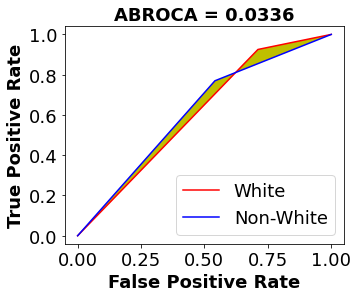

ABROCA: 0.03362037201753154


In [10]:
run_eval('law')

Statistical parity:
{'balanced_accuracy': 0.622443729903537, 'accuracy': 0.6360078277886497, 'fairness': -0.020006053152811454, 'Positive_prot_pred': 0.5988483685220729, 'Positive_non_prot_pred': 0.5788423153692615, 'Negative_prot_pred': 0.40115163147792704, 'Negative_non_prot_pred': 0.42115768463073855}
Equal opportunity
{'balanced_accuracy': 0.622443729903537, 'accuracy': 0.6360078277886497, 'fairness': 0.0018626066028357702, 'TPR_protected': 0.6840579710144927, 'TPR_non_protected': 0.6859205776173285, 'TNR_protected': 0.5681818181818182, 'TNR_non_protected': 0.5535714285714286}
Equalized odds
{'balanced_accuracy': 0.622443729903537, 'accuracy': 0.6360078277886497, 'fairness': 0.0164729962132254, 'TPR_protected': 0.6840579710144927, 'TPR_non_protected': 0.6859205776173285, 'TNR_protected': 0.5681818181818182, 'TNR_non_protected': 0.5535714285714286}
Predictive parity
{'balanced_accuracy': 0.622443729903537, 'accuracy': 0.6360078277886497, 'fairness': 0.10123784261715296, 'TPR_protect

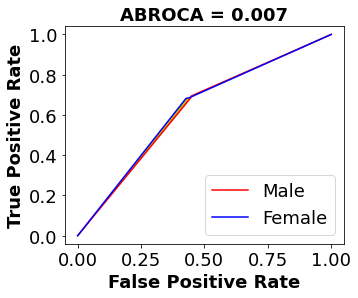

ABROCA: 0.007047106875425703


In [11]:
run_eval('pisa')

Statistical parity:
{'balanced_accuracy': 0.6527777777777778, 'accuracy': 0.775, 'fairness': -0.1278195488721804, 'Positive_prot_pred': 0.8421052631578947, 'Positive_non_prot_pred': 0.7142857142857143, 'Negative_prot_pred': 0.15789473684210525, 'Negative_non_prot_pred': 0.2857142857142857}
Equal opportunity
{'balanced_accuracy': 0.6527777777777778, 'accuracy': 0.775, 'fairness': 0.1455108359133127, 'TPR_protected': 0.8823529411764706, 'TPR_non_protected': 0.7368421052631579, 'TNR_protected': 0.5, 'TNR_non_protected': 0.5}
Equalized odds
{'balanced_accuracy': 0.6527777777777778, 'accuracy': 0.775, 'fairness': 0.1455108359133127, 'TPR_protected': 0.8823529411764706, 'TPR_non_protected': 0.7368421052631579, 'TNR_protected': 0.5, 'TNR_non_protected': 0.5}
Predictive parity
{'balanced_accuracy': 0.6527777777777778, 'accuracy': 0.775, 'fairness': 0.004166666666666652, 'TPR_protected': 0.8823529411764706, 'TPR_non_protected': 0.7368421052631579, 'TNR_protected': 0.5, 'TNR_non_protected': 0.5}

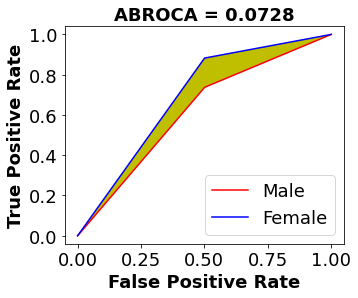

ABROCA: 0.07275541795665635


In [12]:
run_eval('student-academics')

Statistical parity:
{'balanced_accuracy': 0.8759678379988087, 'accuracy': 0.8823529411764706, 'fairness': 0.1540418315432448, 'Positive_prot_pred': 0.5344827586206896, 'Positive_non_prot_pred': 0.6885245901639344, 'Negative_prot_pred': 0.46551724137931033, 'Negative_non_prot_pred': 0.3114754098360656}
Equal opportunity
{'balanced_accuracy': 0.8759678379988087, 'accuracy': 0.8823529411764706, 'fairness': 0.001536098310291889, 'TPR_protected': 0.9032258064516129, 'TPR_non_protected': 0.9047619047619048, 'TNR_protected': 0.8888888888888888, 'TNR_non_protected': 0.7894736842105263}
Equalized odds
{'balanced_accuracy': 0.8759678379988087, 'accuracy': 0.8823529411764706, 'fairness': 0.1009513029886544, 'TPR_protected': 0.9032258064516129, 'TPR_non_protected': 0.9047619047619048, 'TNR_protected': 0.8888888888888888, 'TNR_non_protected': 0.7894736842105263}
Predictive parity
{'balanced_accuracy': 0.8759678379988087, 'accuracy': 0.8823529411764706, 'fairness': 0.001536098310291889, 'TPR_protect

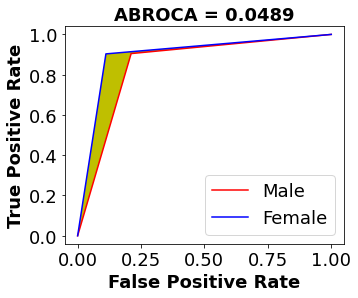

ABROCA: 0.04893955423497981


In [13]:
run_eval('student-mat')

Statistical parity:
{'balanced_accuracy': 0.863905325443787, 'accuracy': 0.9333333333333333, 'fairness': -0.03819522001340181, 'Positive_prot_pred': 0.8760330578512396, 'Positive_non_prot_pred': 0.8378378378378378, 'Negative_prot_pred': 0.12396694214876033, 'Negative_non_prot_pred': 0.16216216216216217}
Equal opportunity
{'balanced_accuracy': 0.863905325443787, 'accuracy': 0.9333333333333333, 'fairness': 0.012538226299694144, 'TPR_protected': 0.9541284403669725, 'TPR_non_protected': 0.9666666666666667, 'TNR_protected': 0.8333333333333334, 'TNR_non_protected': 0.7142857142857143}
Equalized odds
{'balanced_accuracy': 0.863905325443787, 'accuracy': 0.9333333333333333, 'fairness': 0.1315858453473132, 'TPR_protected': 0.9541284403669725, 'TPR_non_protected': 0.9666666666666667, 'TNR_protected': 0.8333333333333334, 'TNR_non_protected': 0.7142857142857143}
Predictive parity
{'balanced_accuracy': 0.863905325443787, 'accuracy': 0.9333333333333333, 'fairness': 0.045648204503956236, 'TPR_protecte

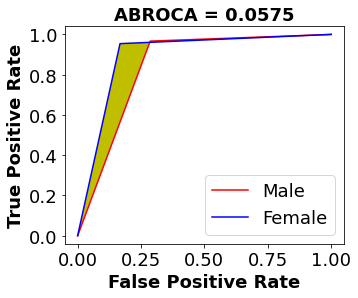

ABROCA: 0.05754055462553366


In [14]:
run_eval('student-por')

Statistical parity:
{'balanced_accuracy': 0.8, 'accuracy': 0.8333333333333334, 'fairness': -0.12744022812020184, 'Positive_prot_pred': 0.7872340425531915, 'Positive_non_prot_pred': 0.6597938144329897, 'Negative_prot_pred': 0.2127659574468085, 'Negative_non_prot_pred': 0.3402061855670103}
Equal opportunity
{'balanced_accuracy': 0.8, 'accuracy': 0.8333333333333334, 'fairness': 0.028205128205128216, 'TPR_protected': 0.8717948717948718, 'TPR_non_protected': 0.9, 'TNR_protected': 0.625, 'TNR_non_protected': 0.7297297297297297}
Equalized odds
{'balanced_accuracy': 0.8, 'accuracy': 0.8333333333333334, 'fairness': 0.13293485793485793, 'TPR_protected': 0.8717948717948718, 'TPR_non_protected': 0.9, 'TNR_protected': 0.625, 'TNR_non_protected': 0.7297297297297297}
Predictive parity
{'balanced_accuracy': 0.8, 'accuracy': 0.8333333333333334, 'fairness': 0.07516891891891897, 'TPR_protected': 0.8717948717948718, 'TPR_non_protected': 0.9, 'TNR_protected': 0.625, 'TNR_non_protected': 0.7297297297297297}

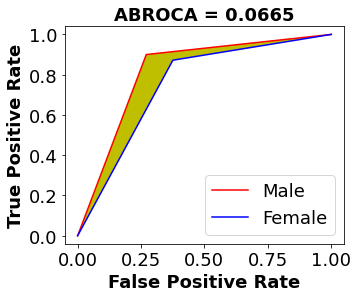

ABROCA: 0.0664674252659953


In [15]:
run_eval('xAPI-Edu')